__Data Science Applications__ Markov Chain Nearest Neighbors 

The Markov Chain Nearest Neighbors algorithm is to

$$maximize  \sum_{(i,j)\in V \times V} s_{ij}x_{ij} $$

$$
\begin{array}{ll}
subject \; to \; & \sum_{j\in V}x_{ij} = k\\ 
\; & \sum_{j\in V}x_{ij} = 1 \\ 
\; & 0\leq x_{ij} \leq 1 \\ 
\end{array}
$$


and the Dual is 


$$
\begin{aligned}
\text{Minimize} \quad & \sum_{i \in V} k \lambda_i + \sum_{j \in V} \mu_j \\
\text{Subject to} \quad & \sum_{i \in V} \lambda_i + \mu_j \geq s_{ij} \quad \forall (i, j) \in V \times V \\
& \lambda_i \geq 0 \quad \forall i \in V \\
& \mu_j \geq 0 \quad \forall j \in V,
\end{aligned}
$$

where $\lambda_i$ and $ \mu_i$ are the dual variables associated with the first and second constraints, repectively.




In [1]:
# Importing the necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
# use SVG as backend
%config InlineBackend.figure_format = 'svg'

import numpy as np

import pandas as pd
import networkx as nx

from matplotlib import MatplotlibDeprecationWarning
import warnings 
warnings.filterwarnings("ignore",category=MatplotlibDeprecationWarning)

In [4]:

LoanDefaultDf = pd.DataFrame(
     {    'Age': [25, 35, 45, 20, 35, 52, 23, 40, 60, 48, 33],
        'Loan' : [40, 60, 80, 20, 120, 18, 95, 62, 100, 220, 150],
     'Default' : [ 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y']},
     index = ['Alice', 'Bob', 'Cindy', 'David', 'Eve', 'Frank', 
              'Gail', 'Henry', 'Ilsa', 'Joe', 'Kim'])
LoanDefaultDf 

,Age,Loan,Default
Alice,25,40,N
Bob,35,60,N
Cindy,45,80,N
David,20,20,N
Eve,35,120,N
Frank,52,18,N
Gail,23,95,Y
Henry,40,62,Y
Ilsa,60,100,Y
Joe,48,220,Y


<Axes: xlabel='Age', ylabel='Loan'>

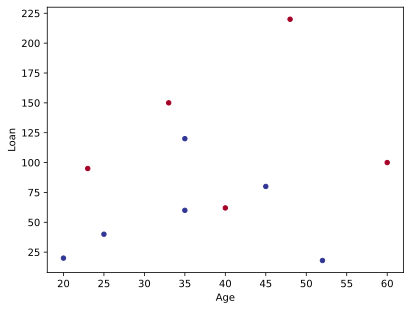

In [7]:
LoanDefaultDf.plot.scatter('Age', 'Loan', c = LoanDefaultDf.Default == 'N',
                   cmap = plt.cm.RdYlBu, colorbar = False)

In [11]:
from scipy.linalg import norm


n = len(LoanDefaultDf)
L = LoanDefaultDf.values[:,:-1]
A = np.zeros( (n, n) )
β = 1e-4
for i in range (n) :
    for j in range (i+1,n):
        A[i,j] = np.exp( -β*norm(L[i] - L[j])**2 )
        A[j,i] = A[i,j] = A[i,j].round(2)
AffinityMatrix = pd.DataFrame( A, columns = LoanDefaultDf .index,
                              index   = LoanDefaultDf .index)

AffinityMatrix  # the s_ij  similarity measures 

,Alice,Bob,Cindy,David,Eve,Frank,Gail,Henry,Ilsa,Joe,Kim
Alice,0.00,0.95,0.82,0.96,0.52,0.89,0.74,0.93,0.62,0.04,0.30
Bob,0.95,0.00,0.95,0.83,0.70,0.81,0.87,1.00,0.80,0.08,0.44
Cindy,0.82,0.95,0.00,0.66,0.84,0.68,0.93,0.97,0.94,0.14,0.60
David,0.96,0.83,0.66,0.00,0.36,0.90,0.57,0.81,0.45,0.02,0.18
Eve,0.52,0.70,0.84,0.36,0.00,0.34,0.93,0.71,0.90,0.36,0.91
Frank,0.89,0.81,0.68,0.90,0.34,0.00,0.51,0.81,0.51,0.02,0.17
Gail,0.74,0.87,0.93,0.57,0.93,0.51,0.00,0.87,0.87,0.20,0.73
Henry,0.93,1.00,0.97,0.81,0.71,0.81,0.87,0.00,0.83,0.08,0.46
Ilsa,0.62,0.80,0.94,0.45,0.90,0.51,0.87,0.83,0.00,0.23,0.72
Joe,0.04,0.08,0.14,0.02,0.36,0.02,0.20,0.08,0.23,0.00,0.60


In [13]:
def AffinityToData(Df):
    Vstring = 'set V := '
    Sstring = 'param :      E     :    s     := '

    for i in range(len(Df)):
        Mvi = Df.index[i]
        Vstring += '\n    %s ' % Mvi
        for j in range(len(Df)):
            if i == j: continue
            Mvj = Df.index[j]
            Es = ( Mvi, Mvj, Df.loc[Mvi,Mvj])
            Sstring += '\n%12s %12s%10s  ' % Es
    Vstring += '; \n\n'
    Sstring += ' ; \n \n end;'
    return Vstring + Sstring

V = AffinityToData(AffinityMatrix.iloc[:5,:5])
print(V)

set V := 
    Alice 
    Bob 
    Cindy 
    David 
    Eve ; 

param :      E     :    s     := 
       Alice          Bob      0.95  
       Alice        Cindy      0.82  
       Alice        David      0.96  
       Alice          Eve      0.52  
         Bob        Alice      0.95  
         Bob        Cindy      0.95  
         Bob        David      0.83  
         Bob          Eve       0.7  
       Cindy        Alice      0.82  
       Cindy          Bob      0.95  
       Cindy        David      0.66  
       Cindy          Eve      0.84  
       David        Alice      0.96  
       David          Bob      0.83  
       David        Cindy      0.66  
       David          Eve      0.36  
         Eve        Alice      0.52  
         Eve          Bob       0.7  
         Eve        Cindy      0.84  
         Eve        David      0.36   ; 
 
 end;


In [15]:
with open('kNNaffinity.dat','w') as FileObject:
    FileObject.write( AffinityToData(AffinityMatrix) )

In [17]:
%%script glpsol -m /dev/stdin -d kNNaffinity.dat

set V;
set E, within V cross V;

param s{E};
param n := 11;  # Size of V = |V|
param k := 3 ;

var x{(i,j) in E} >= 0;

maximize TotalSimilarity: sum{(i,j) in E} s[i,j]*x[i,j];
    
subject to DegreeOfk{i in V}:
    sum{(i,j) in E} x[i,j] = k ;

subject to ProbabilityBound{ (i,j) in E }:
    x[i,j] <= 1 ;    
    
subject to ProbabilitySum{ j in V}:
    sum{(i,j) in E} x[i,j] = 1 ;
    
solve;

display TotalSimilarity;  


display x;
   
end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin -d kNNaffinity.dat
Reading model section from /dev/stdin...
29 lines were read
Reading data section from kNNaffinity.dat...
kNNaffinity.dat:126: warning: final NL missing before end of file
126 lines were read
Generating TotalSimilarity...
Generating DegreeOfk...
Generating ProbabilityBound...
Generating ProbabilitySum...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
133 rows, 110 columns, 440 non-zeros
Preprocessing...
22 rows, 110 columns, 220 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 21
      0: obj =   4.670000000e+00 inf =   1.000e+02 (13)
     39: obj =   1.589000000e+01 inf =   4.900e+01 (5)
LP HAS NO PRIMAL FEASIBLE SOLUTION
glp_simplex: unable to recover undefined or non-optimal solution
Time used:   0.0 secs
Memory used: 0.4

In [19]:
%%script glpsol -m /dev/stdin -d kNNaffinity.dat

set V;
set E, within V cross V;

param s{E};
param n := 11;  # Size of V = |V|
param k := 3 ;

var x{(i,j) in E} >= 0;

maximize TotalSimilarity: sum{(i,j) in E} s[i,j]*x[i,j];
    
subject to DegreeOfk{j in V}:
    sum{(i,j) in E} x[i,j] <= k ;

subject to ProbabilityBound{ (i,j) in E }:
    x[i,j] <= 1 ;    
    
subject to ProbabilitySum{ j in V}:
    sum{(i,j) in E} x[i,j] = 1 ;
    
#subject to ExpectedDegree:
#    sum{(i,j) in E} x[i,j] = n*k;

solve;

display TotalSimilarity;  

table tout {(i,j) in E} OUT "CSV" "TransitionProbabilities.csv" :
i, j, x[i,j];

display x;
   
end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin -d kNNaffinity.dat
Reading model section from /dev/stdin...
34 lines were read
Reading data section from kNNaffinity.dat...
kNNaffinity.dat:126: warning: final NL missing before end of file
126 lines were read
Generating TotalSimilarity...
Generating DegreeOfk...
Generating ProbabilityBound...
Generating ProbabilitySum...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
133 rows, 110 columns, 440 non-zeros
Preprocessing...
22 rows, 110 columns, 220 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 22
*     0: obj =   5.710000000e+00 inf =   0.000e+00 (63)
*    19: obj =   1.010000000e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (412607 bytes)
Display statement at line 27
TotalSimilarity.val = 10.1

In [21]:
FN = 'TransitionProbabilities.csv'
EdgesDf = pd.read_csv(FN)
MarkovDf = pd.DataFrame( columns = AffinityMatrix.columns, index = AffinityMatrix.index)
for idx, row in EdgesDf.iterrows():
    MarkovDf.loc[ row.i, row.j] = row.x
for idx in MarkovDf.index:
    MarkovDf.loc[idx,idx] = 0  # diagonal vanishes 
MarkovDf = MarkovDf.astype(int)
MarkovDf.head(10)

,Alice,Bob,Cindy,David,Eve,Frank,Gail,Henry,Ilsa,Joe,Kim
Alice,0,0,0,1,0,0,0,0,0,0,0
Bob,0,0,0,0,0,0,0,1,0,0,0
Cindy,0,0,0,0,0,0,1,0,1,0,0
David,1,0,0,0,0,1,0,0,0,0,0
Eve,0,0,0,0,0,0,0,0,0,0,1
Frank,0,0,0,0,0,0,0,0,0,0,0
Gail,0,0,0,0,1,0,0,0,0,0,0
Henry,0,1,1,0,0,0,0,0,0,0,0
Ilsa,0,0,0,0,0,0,0,0,0,0,0
Joe,0,0,0,0,0,0,0,0,0,0,0


In [23]:
MarkovDf.sum(axis=0)

Alice    1
Bob      1
Cindy    1
David    1
Eve      1
Frank    1
Gail     1
Henry    1
Ilsa     1
Joe      1
Kim      1
dtype: int64

In [25]:
kNNG = nx.from_pandas_adjacency(MarkovDf)
len(kNNG.edges)

9

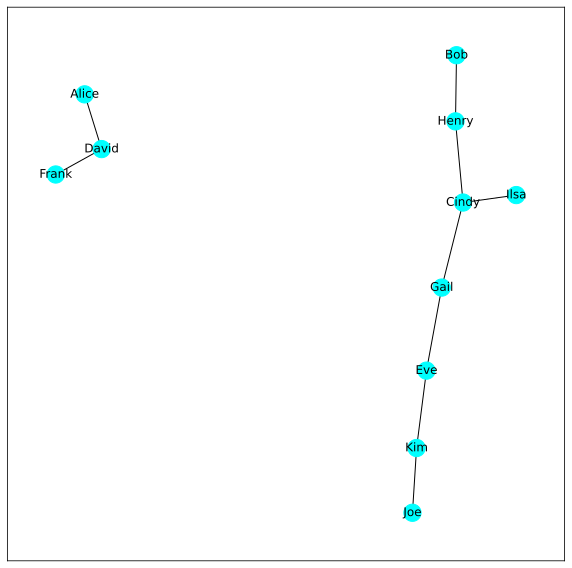

In [27]:
fig2,ax2 = plt.subplots(figsize = (10,10))
nx.draw_networkx(kNNG, with_labels = True, node_color = 'cyan') 

Considering $k = 3,$ the neighbors of the 11 loan applicants are:

    
- Alice : David
- Bob : Henry
- Cindy : Gail, Ilsa
- David : Alice, Frank
- Eve : Kim
- Frank : David
- Gail : Eve
- Henry : Bob, Cindy 
- Ilsa : Cindy
- Joe : Kim
- Kim : Eve